In [1]:
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/Schilderijen-Classificeren" "/content/drive"

Mounted at /gdrive


In [2]:
import shutil
shutil.unpack_archive('drive/Picasso_Rubens_400_100_100.zip','.','zip')

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    "Picasso_Rubens_400_100_100/train",
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    "Picasso_Rubens_400_100_100/validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    "Picasso_Rubens_400_100_100/test",
    image_size=(180, 180),
    batch_size=32)

Found 800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [4]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [6]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss")
]

In [7]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
25/25 [==============================] - 18s 219ms/step - loss: 0.9529 - accuracy: 0.4663 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/30
25/25 [==============================] - 6s 200ms/step - loss: 0.6754 - accuracy: 0.6000 - val_loss: 0.6525 - val_accuracy: 0.7250
Epoch 3/30
25/25 [==============================] - 6s 201ms/step - loss: 0.6821 - accuracy: 0.5825 - val_loss: 0.6134 - val_accuracy: 0.7050
Epoch 4/30
25/25 [==============================] - 6s 201ms/step - loss: 0.6702 - accuracy: 0.7513 - val_loss: 0.4375 - val_accuracy: 0.8100
Epoch 5/30
25/25 [==============================] - 6s 202ms/step - loss: 0.5360 - accuracy: 0.7625 - val_loss: 0.4221 - val_accuracy: 0.8200
Epoch 6/30
25/25 [==============================] - 6s 204ms/step - loss: 0.5636 - accuracy: 0.7650 - val_loss: 0.4461 - val_accuracy: 0.7850
Epoch 7/30
25/25 [==============================] - 6s 200ms/step - loss: 0.4520 - accuracy: 0.7950 - val_loss: 0.4386 - val_accuracy: 0.8000
Epoch

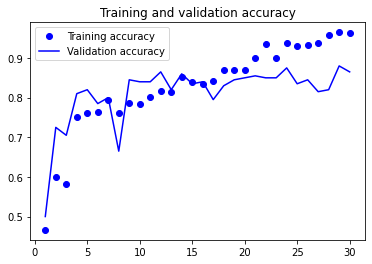

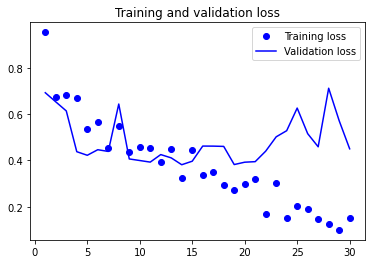

In [8]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [9]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

7/7 [==============================] - 1s 28ms/step - loss: 0.3372 - accuracy: 0.8800
Test accuracy: 0.880
